# Machine Learning for Predictive Forecasting
After completing the Exploratory Data Analysis (EDA), we have gained valuable insights into the historical dynamics of the COVID-19 pandemic in Japan. The next phase of this project transitions from description to prediction, leveraging supervised machine learning to create a practical forecasting tool.

**The primary objective** of this modeling phase is to forecast the number of new daily cases **(new_cases_smoothed)**.

### Why focus on New Case Prediction?
Predicting the number of new cases provides a direct, tangible, and actionable metric. Unlike more abstract epidemiological indicators, a case forecast offers a clear outlook that can inform public health planning, resource allocation, and public awareness. It answers the critical, real-world question: "Based on past trends, what can we expect the caseload to be in the near future?"

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [19]:
df = pd.read_csv(r'D:\Project\pyhton_covid_project\Japan Covid Data\cleaned_data_japan-owid-covid-data.csv')

In [20]:
#Create a Function to Inspect the DataFrame
#This function will return a DataFrame with the count of non-null values, null values, amd data types
def inspect_dataframe(data_frame):
    non_null_count = data_frame.count().reset_index()
    non_null_count = non_null_count.rename(columns={'index' : 'column_name', 0: 'non_null_count'})
    non_null_count['null_count'] = data_frame.shape[0] - non_null_count['non_null_count']
    column_type = data_frame.dtypes.reset_index()
    column_type = column_type.rename(columns={'index' : 'column_name', 0:'data_type'})
    dat_inspection = pd.merge(non_null_count, column_type, 'left', left_on= 'column_name', right_on='column_name')
    return dat_inspection.sort_values(by='non_null_count', ascending=False)

In [21]:
inspect_dataframe(df)

,column_name,non_null_count,null_count,data_type
0,date,1674,0,object
1,location,1674,0,object
2,total_cases,1674,0,int64
4,total_deaths,1674,0,int64
13,total_vaccinations,1674,0,float64
14,people_vaccinated,1674,0,float64
9,total_tests,1674,0,float64
38,perc_vaccinated_one_dose,1674,0,float64
34,year,1674,0,int64
36,day_of_year,1674,0,int64


In [22]:
# needd to drop columns with too many null values
column_to_use = inspect_dataframe(df)
column_to_use	= column_to_use[column_to_use['non_null_count'] > 1000]
column_to_use = column_to_use.column_name
column_to_use

0                           date
1                       location
2                    total_cases
4                   total_deaths
13            total_vaccinations
14             people_vaccinated
9                    total_tests
38      perc_vaccinated_one_dose
34                          year
36                   day_of_year
15       people_fully_vaccinated
22                    median_age
21            population_density
16                total_boosters
31                    population
30       human_development_index
29               life_expectancy
28    hospital_beds_per_thousand
27                  male_smokers
26                female_smokers
25           diabetes_prevalence
24         cardiovasc_death_rate
23                gdp_per_capita
35                         month
3             new_cases_smoothed
5            new_deaths_smoothed
37                           IFR
8                  hosp_patients
7                   icu_patients
20              stringency_index
6         

In [23]:
#create a new DataFrame with only the columns we want to use
df = df[column_to_use]

In [24]:
inspect_dataframe(df)

,column_name,non_null_count,null_count,data_type
0,date,1674,0,object
1,location,1674,0,object
2,total_cases,1674,0,int64
3,total_deaths,1674,0,int64
4,total_vaccinations,1674,0,float64
5,people_vaccinated,1674,0,float64
6,total_tests,1674,0,float64
7,perc_vaccinated_one_dose,1674,0,float64
8,year,1674,0,int64
9,day_of_year,1674,0,int64


In [25]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear

In [26]:
# create lagged features (7, 14, 21 days)
target_col = 'reproduction_rate'
features_to_lag = [
    'new_cases_smoothed',
    'stringency_index',
    'people_fully_vaccinated',
    'total_tests'
]

lag_periods = [7, 14, 21]

for feature in features_to_lag:
    for lag in lag_periods:
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)


In [27]:
# create rolling averages
rolling_window_size = 14
feature_to_roll = 'new_cases_smoothed'

df[f'{feature_to_roll}_roll_mean_{rolling_window_size}'] = df[feature_to_roll].rolling(window=rolling_window_size).mean()
df[f'{feature_to_roll}_roll_std_{rolling_window_size}'] = df[feature_to_roll].rolling(window=rolling_window_size).std()

In [28]:
# Drop all null values because models cannot handle nulls
df = df.dropna()

In [29]:
inspect_dataframe(df)

,column_name,non_null_count,null_count,data_type
0,date,976,0,datetime64[ns]
1,location,976,0,object
2,total_cases,976,0,int64
3,total_deaths,976,0,int64
4,total_vaccinations,976,0,float64
5,people_vaccinated,976,0,float64
6,total_tests,976,0,float64
7,perc_vaccinated_one_dose,976,0,float64
8,year,976,0,int64
9,day_of_year,976,0,int32


Next is make prediction model for new case smoothed variable

In [30]:
# Define features and target variable
target_col = 'new_cases_smoothed'
x	= df.drop(columns=[target_col, 'date', 'location'])
y = df[target_col]

# Split the date into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the model
new_cases_model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True, n_jobs=-1)
new_cases_model.fit(x_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [31]:
# model testing and evaluaton
y_pred = new_cases_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 12338084.851780392
R^2 Score: 0.9952527649105372


Note: r2 99% is extreamly high number for real world data. need to further check to potential data leakage.

C:\Users\hp\AppData\Local\Temp\ipykernel_20108\1275360877.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


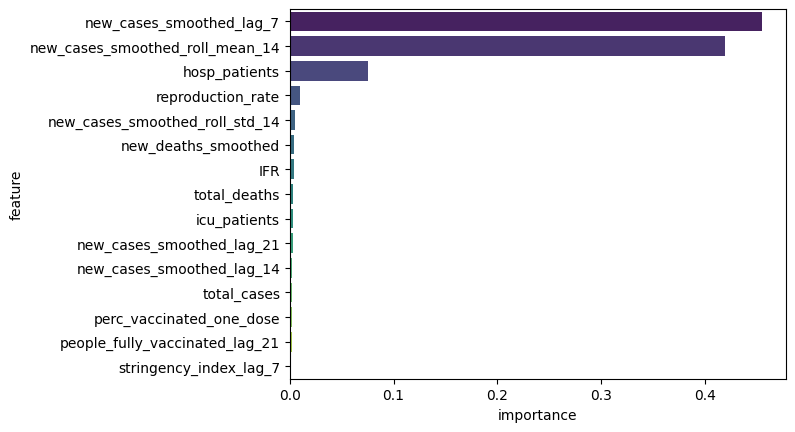

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
nc_feature_importances = new_cases_model.feature_importances_
feature_importances = pd.DataFrame({
				'feature': x_train.columns,
				'importance': nc_feature_importances
}).sort_values('importance', ascending=False)
sns.barplot(
				x='importance',
				y='feature',
				data= feature_importances.head(15),
				palette='viridis'
)
plt.show()

Note: as i suspected, i try to predict new case variable with new case variable feature. of course the model will have high accuracy. i need to remove those variable

note: r2 score is too high but MSE is quite high. it might be because overfitting. need to apply algorithm that prevent overfitting

In [33]:
# Train the model again with cross validation
from	sklearn.model_selection import cross_val_score, TimeSeriesSplit

# Define the time series split
tscv = TimeSeriesSplit(n_splits=5)

# Perform cross-validation
scores = cross_val_score(
    estimator=new_cases_model,
    X=x,
    y=y,
    cv=tscv,
    scoring='r2',
    n_jobs=-1
)

print(f'Cross-validated R^2 scores: {scores}')
for i, score in enumerate(scores):
				print(f'Fold {i+1}: {score:.4f}')

print(f'Mean R^2 score: {scores.mean():.4f}')

Cross-validated R^2 scores: [-0.43247956 -0.14187543  0.07328787 -0.26103223  0.4736133 ]
Fold 1: -0.4325
Fold 2: -0.1419
Fold 3: 0.0733
Fold 4: -0.2610
Fold 5: 0.4736
Mean R^2 score: -0.0577


In [34]:
#time series cross validation
x_traincv, x_test_final, y_traincv, y_test_final = train_test_split(x, y, test_size=0.2, shuffle=False)

# time split
tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []
r2_scores = []
model = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True, n_jobs=-1)

for fold, (train_index, test_index) in enumerate(tscv.split(x_traincv)):
				x_train_fold, x_test_fold = x_traincv.iloc[train_index], x_traincv.iloc[test_index]
				y_train_fold, y_test_fold = y_traincv.iloc[train_index], y_traincv.iloc[test_index]

				# Train the model

				model.fit(x_train_fold, y_train_fold)

				# Predict and evaluate
				y_pred_fold = model.predict(x_test_fold)
				mse = mean_squared_error(y_test_fold, y_pred_fold)
				r2 = r2_score(y_test_fold, y_pred_fold)

				mse_scores.append(mse)
				r2_scores.append(r2)

print(f'Cross-validated Mean Squared Error: {np.mean(mse_scores):.4f}')
print(f'Cross-validated R^2 Score: {np.mean(r2_scores):.4f}')

Cross-validated Mean Squared Error: 235319078.3932
Cross-validated R^2 Score: -0.1280


Note:
- deffinetelly overfitting
- need to tune or change the model or parameters
- or drop	some features

In [35]:
# Choose the top 5 features based on importance
column_to_use = pd.DataFrame({
				'feature': x_train.columns,
				'importance': nc_feature_importances
}).sort_values('importance', ascending=False).head(5).feature.tolist()
column_to_use

['new_cases_smoothed_lag_7',
 'new_cases_smoothed_roll_mean_14',
 'hosp_patients',
 'reproduction_rate',
 'new_cases_smoothed_roll_std_14']

In [36]:
y

123        236.71
124        236.71
125        236.71
126        129.71
127        129.71
          ...    
1094    135161.43
1095    135161.43
1096    135161.43
1097    135161.43
1098    135161.43
Name: new_cases_smoothed, Length: 976, dtype: float64

In [37]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
#select the top features based on importance
x	= x[column_to_use]
#time series cross validation
x_traincv, x_test_final, y_traincv, y_test_final = train_test_split(x, y, test_size=0.2, shuffle=False)


# time split
tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []
r2_scores = []
#	Change the model to a simple Ridge regression model
# This is to avoid overfitting and to simplify the model
simple_model = make_pipeline(
				StandardScaler(),
				Ridge(alpha=1.0, random_state=42)
)

for fold, (train_index, test_index) in enumerate(tscv.split(x_traincv)):
				x_train_fold, x_test_fold = x_traincv.iloc[train_index], x_traincv.iloc[test_index]
				y_train_fold, y_test_fold = y_traincv.iloc[train_index], y_traincv.iloc[test_index]

				# Train the model

				simple_model.fit(x_train_fold, y_train_fold)

				# Predict and evaluate
				y_pred_fold = simple_model.predict(x_test_fold)
				mse = mean_squared_error(y_test_fold, y_pred_fold)
				r2 = r2_score(y_test_fold, y_pred_fold)

				mse_scores.append(mse)
				r2_scores.append(r2)

print('all mse scores:', mse_scores)
print(f'Cross-validated Mean Squared Error: {np.mean(mse_scores):.4f}')
print('all r2 scores:', r2_scores)
print(f'Cross-validated R^2 Score: {np.mean(r2_scores):.4f}')


all mse scores: [299874.32176049857, 792252.6954389741, 9564732.799161572, 139008012.9342893, 53543889.36361106]
Cross-validated Mean Squared Error: 40641752.4229
all r2 scores: [0.8920360844546207, 0.7424662786249463, 0.8093471558177997, 0.8244064506056177, 0.8496949614111512]
Cross-validated R^2 Score: 0.8236


Note : this results in a much better model, with a lower mean squared error and a higher R^2 score and no overfitting because use cross-validation and a simpler model

In [51]:
#select the top features based on importance
x	= x[column_to_use]
#time series cross validation
x_traincv, x_test_final, y_traincv, y_test_final = train_test_split(x, y, test_size=0.2, shuffle=False)
# create final	model with the entire training set
new_cases_prediction_model = make_pipeline(
				StandardScaler(),
				Ridge(alpha=1.0, random_state=42)
)
new_cases_prediction_model.fit(x_traincv, y_traincv)

# test	the final model
y_pred_final = new_cases_prediction_model.predict(x_test_final)
mse_final = mean_squared_error(y_test_final, y_pred_final)
r2_final = r2_score(y_test_final, y_pred_final)
print(f'Final Mean Squared Error: {mse_final}')
print(f'Final R^2 Score: {r2_final}')

Final Mean Squared Error: 769853545.8780121
Final R^2 Score: 0.8006768206731076


In [54]:
# Save the model to a file
import pickle
with open('new_cases_prediction_model.pkl', 'wb') as file:
				pickle.dump(new_cases_prediction_model, file)

In [56]:
# Save the model to a file
import pickle
with open('simple_model.pkl', 'wb') as file:
				pickle.dump(simple_model, file)

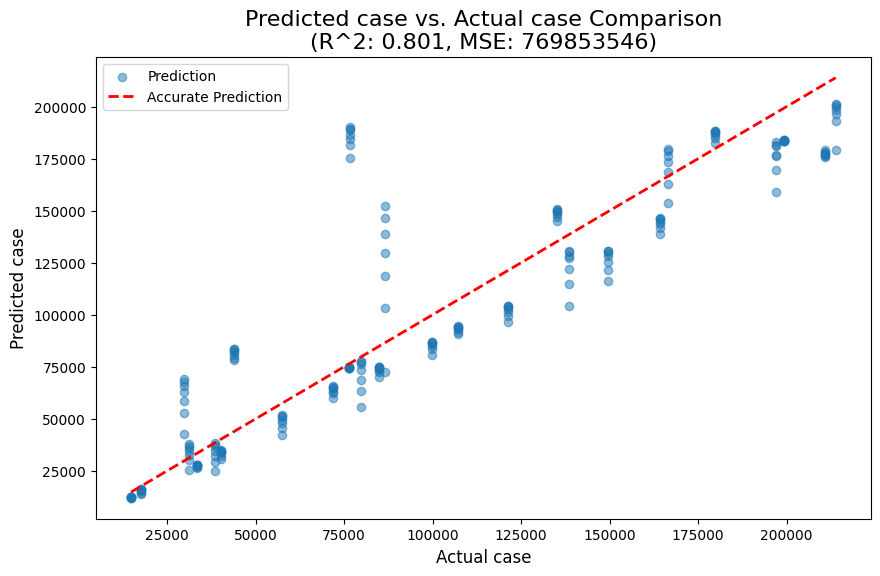

In [40]:
# create a visualization of predicted new cases
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
plt.scatter(y_test_final, y_pred_final, alpha=0.5)
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], '--', color='red', lw=2)
plt.xlabel("Actual case", fontsize=12)
plt.ylabel("Predicted case", fontsize=12)
plt.title(f"Predicted case vs. Actual case Comparison\n(R^2: {r2_final:.3f}, MSE: {mse_final:.0f})", fontsize=16)
plt.legend(['Prediction', 'Accurate Prediction'])
plt.show()

In [41]:
dfc = df.copy(deep=True)
last_30_days = dfc.tail(30)

# last row of dataframe as starting point for prediction
last_row = dfc.iloc[[-1]].copy()

# List to save prediction results and dates
future_predictions = []
future_dates = []

# iterate prediction of new cases for next 7 days
for i in range(7):
    # features for prediction (using the last row)
    features_for_pred = last_row[x.columns]
    
    # predict the next day new cases
    next_day_pred = new_cases_prediction_model.predict(features_for_pred)[0]
    
    # save the prediction result and date in previous lists
    future_predictions.append(next_day_pred)
    last_date = last_row['date'].iloc[0]
    next_date = last_date + pd.Timedelta(days=1)
    future_dates.append(next_date)
    
    # create a new row for next day prediction using the last row (using predicted value)
    new_row = last_row.copy()
    new_row['date'] = next_date
    new_row['new_cases_smoothed'] = next_day_pred 
    
    # update lagged features adjusting the lag values with the new row (lag 7 for today is lag 6 for yesterday, etc.)
    for lag in [7, 14, 21]:
        if f'new_cases_smoothed_lag_{lag}' in new_row.columns:
            prev_lag_col = f'new_cases_smoothed_lag_{lag}' if lag > 1 else 'new_cases_smoothed'
            new_row[f'new_cases_smoothed_lag_{lag-1}'] = last_row[prev_lag_col].iloc[0]

    # Update rolling features with recalculated values
    temp_series = pd.concat([dfc['new_cases_smoothed'], pd.Series(future_predictions)])
    new_rolling_mean = temp_series.rolling(window=14).mean().iloc[-1]
    new_row['new_cases_smoothed_roll_mean_14'] = new_rolling_mean
    
    # use new row as the last row for the new itterationn
    last_row = new_row

# make a new dataframe for the forecasted results
forecast_df = pd.DataFrame({'date': future_dates, 'predicted_cases': future_predictions})

print("Prediction of New Cases For Next 7 days:")
print(forecast_df)




Prediction of New Cases For Next 7 days:
        date  predicted_cases
0 2023-01-08    150685.815142
1 2023-01-09    150163.917922
2 2023-01-10    149621.978538
3 2023-01-11    149059.227320
4 2023-01-12    148474.865044
5 2023-01-13    147868.061788
6 2023-01-14    147237.955764


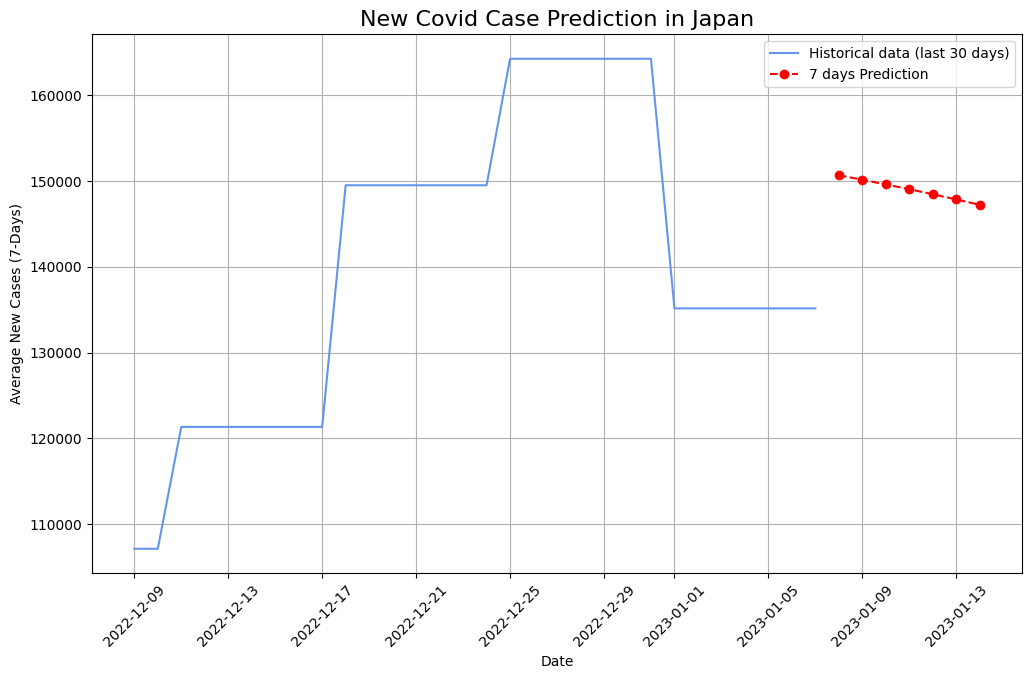

In [42]:
# visualization
plt.figure(figsize=(12, 7))
plt.plot(last_30_days['date'], last_30_days['new_cases_smoothed'], label='Historical data (last 30 days)', color='cornflowerblue')
plt.plot(forecast_df['date'], forecast_df['predicted_cases'], label='7 days Prediction', color='red', marker='o', linestyle='--')
plt.title('New Covid Case Prediction in Japan', fontsize=16)
plt.ylabel('Average New Cases (7-Days)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Note: The graph shows the historical data for the last 30 days and the predicted new cases for the next 7 days. The blue line represents the historical average of new cases smoothed over a 7-day period, while the red line indicates the forecasted values for the next week. The model predicts a slight increase in new cases, which is consistent with recent trends in the data.